# Para a aula de algoritmos Genéticos

## Sumário

- [Números aleatórios em Python](#Números-aleatórios-em-Python)
    - [Bibliotecas](#Bibliotecas)
        - [Numpy ou Python](#Numpy-ou-Python)
        - [Mersenne Twister pseudo-random number generator](#Mersenne-Twister-pseudo-random-number-generator)
- [Variáveis aleatórias e histogramas](#Variáveis-aleatórias-e-histogramas)
- [Operações básicas](#Operações-básicas)
    - [Inversão-de-bits](#Inversão-de-bits)
    - [Comparar palavras](#Comparar-palavras)
- [Funções](#Funções)
    - [Teste das funções](#Teste-das-funções)
        - [Inverte bits](#Inverte-bits)
        - [Criar e comparar palavras](#Criar-e-comparar-palavras)
            - [Criar palavra de 40 bits](#Criar-palavra-de-40-bits)
    - [Probabilidade de Mutação](#Probabilidade-de-Mutação)
        - [Representação real](#Representação-real)
        - [Representação binária](#Representação-binária)
    
   

# Números aleatórios em Python

## Bibliotecas

### Numpy ou Python

In [2]:
pathFileImages = 'C:/Users/claud/Dropbox/RepoGit/Disciplina/Computação Evolucionária/Jupyter/'


from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr

### Mersenne Twister pseudo-random number generator

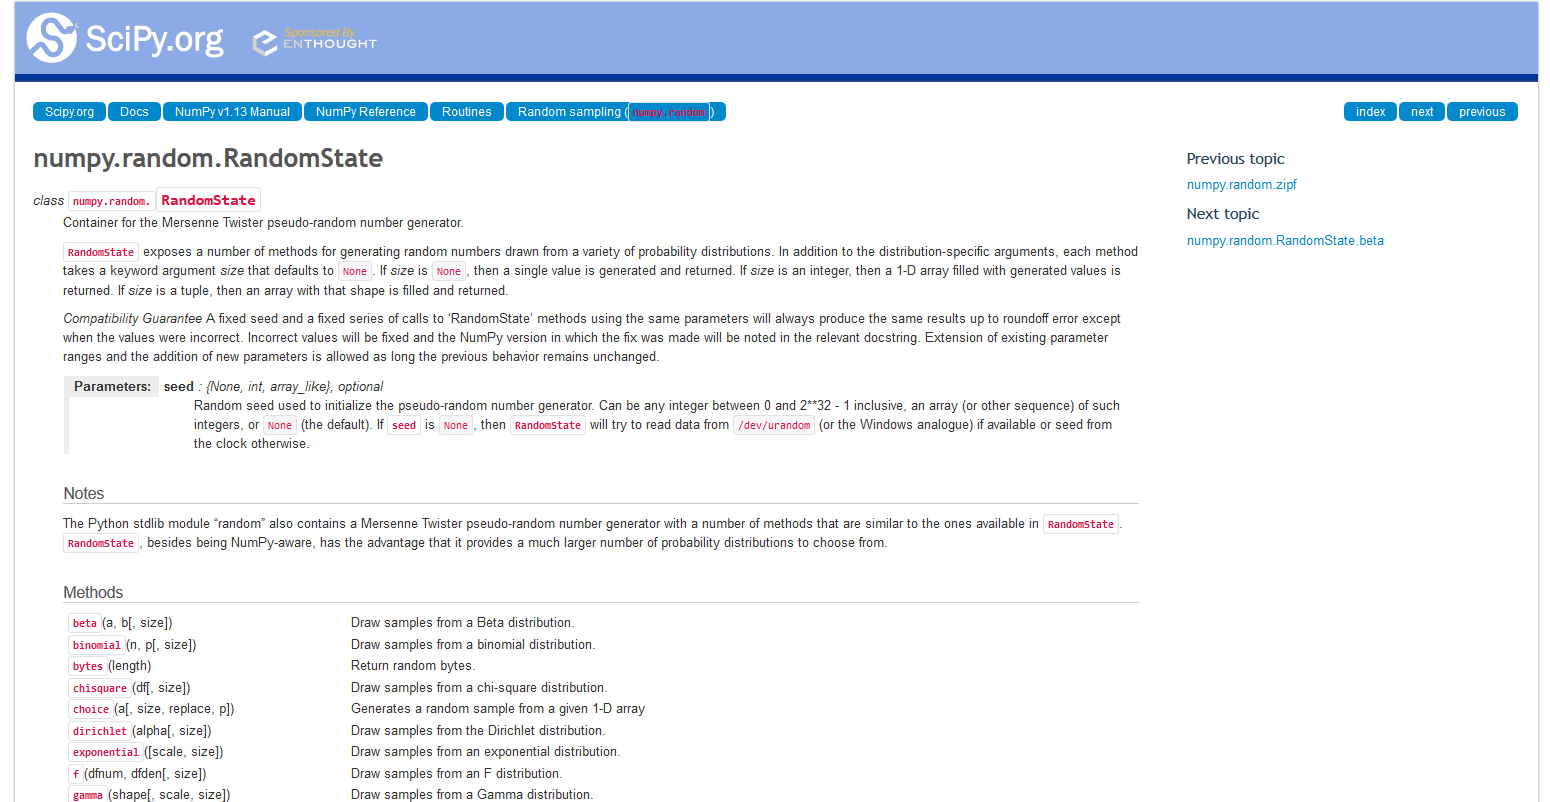

In [104]:

Image(filename = pathFileImages + 'numpy_random_RandomState.png')

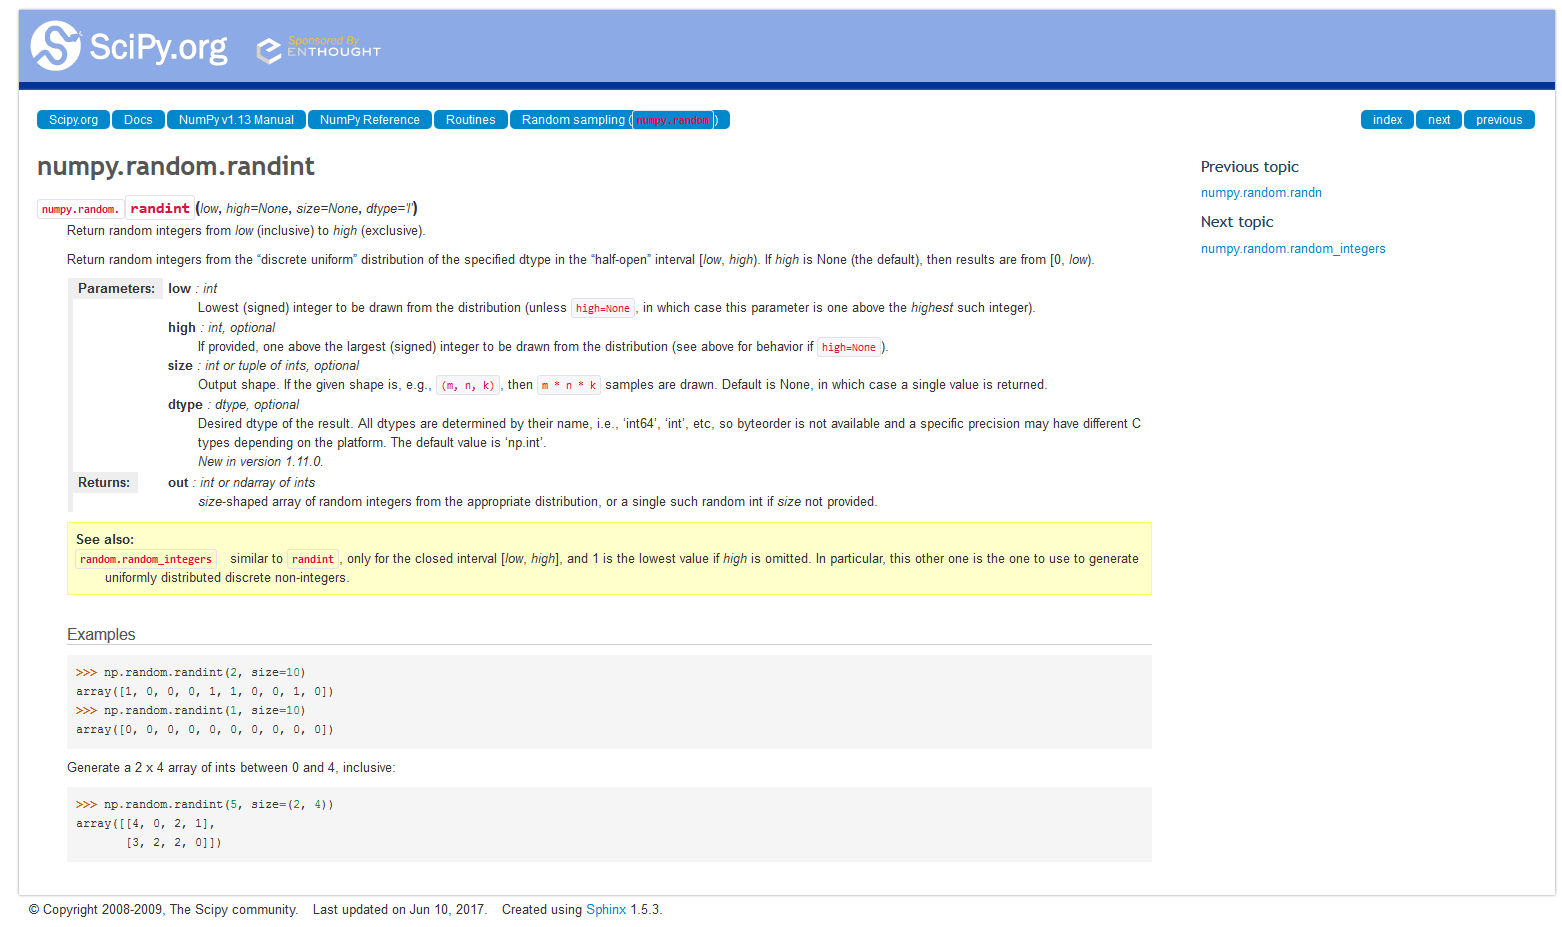

In [103]:
Image(filename = pathFileImages + 'numpy_random_randint.png')

# Variáveis aleatórias e histogramas

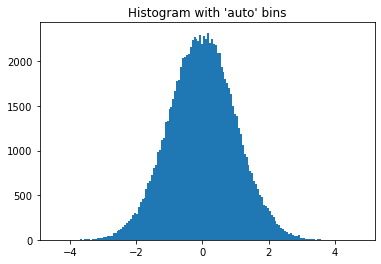

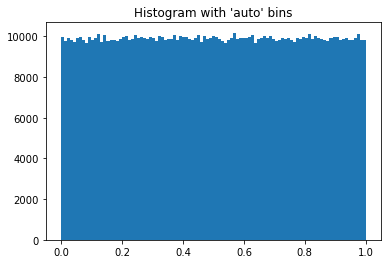

In [8]:
sigma = 1
mi = 0

#https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.randn.html#numpy.random.randn
a = sigma * np.random.randn(100000, 1) + mi

b = np.random.rand(1000000, 1)

#print(a)

plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()


plt.hist(b, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()


In [6]:
np.random.randn(10, 1)

array([[-0.2248109 ],
       [ 0.59889784],
       [-0.31635133],
       [ 0.36658922],
       [-0.18645989],
       [-0.48279656],
       [-0.01159669],
       [-0.07614253],
       [-1.36397337],
       [ 0.83859564]])

# Operações básicas

## Inversão de bits

In [58]:
#Definição de binário em Python
a = 0b1110001
print( 'Como escrever uma palavra em Python a = 0b1110001:', bin(a) )

#Deslocamento de bits
shit = 3
a = 1 << shit
print( 'Bits em Python - shit = 3, a = 1 << shit:', bin(a) )

#Inversão de bits
print( 'Invertendo o bit o segundo bit, 0b100 ^ 0b010:', bin( 0b100 ^ 0b010 ),'0b110' )
print( 'Invertendo o bit o primeiro bit, 0b100 ^ 0b001:', bin( 0b100 ^ 0b001 ), '0b101' )
print( 'Invertendo o bit mais significativo, 0b100 ^ 0b100:', bin( 0b100 ^ 0b100 ), '0b000' )

Como escrever uma palavra em Python a = 0b1110001: 0b1110001
Bits em Python - shit = 3, a = 1 << shit: 0b1000
Invertendo o bit o segundo bit, 0b100 ^ 0b010: 0b110 0b110
Invertendo o bit o primeiro bit, 0b100 ^ 0b001: 0b101 0b101
Invertendo o bit mais significativo, 0b100 ^ 0b100: 0b0 0b000


In [57]:
print('Outro exemplo de inversão de bits')
b = 0b100001
nBits = b.bit_length() 
print('Palavra ', bin(b), 'de números de bits', nBits )

shift = nBits - 1
mask = 1 << shift 
print( 'Mask do tamanho da palavra', bin( mask ) )
#Trocar o quarto bit
mask = 1 << 3
print( 'Trocar o quarto bit usando a máscara', bin( mask ) )
print( 'Trocando o quarto bit da palavra 0b100001:', bin( b ^ mask ) )

Outro exemplo de inversão de bits
Palavra  0b100001 de números de bits 6
Mask do tamanho da palavra 0b100000
Trocar o quarto bit usando a máscara 0b1000
Trocando o quarto bit da palavra 0b100001: 0b101001


## Comparar palavras

In [55]:
#Comparar palavras 
a = 0b110010
b = 0b110010
print('Comparando duas palavras. Número bits diferentes', bin( a ^ b ).count("1") )

Comparando duas palavras. Número bits diferentes 0


# Funções

In [62]:
def invertBit( palavra, posBit ):
    
    if posBit > palavra.bit_length():
        return -1
    elif posBit == 0:
        return -2
    
    mask =  1 << posBit - 1
    return palavra ^ mask


def criarPalavra( nBits ):
    
    palavra = 1 << nBits
    
    for i in range(1,nBits + 1):
        if npr.rand( ) > 0.5:            
            palavra = invertBit( palavra, i )
            #print( 'Criando palavras aleatórias/criandoPalavras/AlterarBit', i, ' = ', bin(palavra) )
            
            
    return palavra


def compararPalavras( palavra1, palavra2 ):
    
    return bin( palavra1 ^ palavra2 ).count("1")


def printPop( pop ):
    
    for i in range(len(pop)): 
        print( bin( pop[ i ] ) )
        

def criarPop( sizePop, sizeBin ):
    pop = [ ]
    for i in range(sizePop):
        pop.append( criarPalavra( sizeBin ) )
    
    return pop

def trocarPalavras( pop, fitness, sizePopToChange, sizeBin ):
    popTemp = criarPop( sizePopToChange, sizeBin ) 
    pop[0:sizePopToChange] = popTemp[0:sizePopToChange]
    fitness[0:sizePopToChange] =  -1*np.ones(sizePopToChange, int) 
    
    
def ordenarPopbyFitness(fitness, pop):
    return list( zip(*sorted(zip(fitness, pop_), key = lambda pair: pair[0])) )


## Teste das funções

### Inverte bits

In [39]:
b = 0b100001
print( 'Function invertBit da palavra 0b100001:', bin( invertBit( b, 4 ) ) )


#Criando palavras aleatórias
#O bit mais significativo fica apenas de marcação
#Criar uma palavra de 6 bits
size = 6
palavra = 1 << size
print( 'Criando palavras aleatórias', bin( palavra ) )

palavra =  invertBit( palavra, 6 )
print( 'Criando palavras aleatórias/bitmaisSignificativo', bin( palavra ) )

palavra =  invertBit( palavra, 1 )
print( 'Criando palavras aleatórias/terceiroBit', bin( palavra ) )


Function invertBit da palavra 0b100001: 0b101001
Criando palavras aleatórias 0b1000000
Criando palavras aleatórias/bitmaisSignificativo 0b1100000
Criando palavras aleatórias/terceiroBit 0b1100001


### Criar e comparar palavras

In [52]:
#Criar palavra
print( 'Criando uma palavra aleatória', bin( criarPalavra( 6 ) ) )

#Criar palavras até que duas delas sejam diferentes em todos os bits
print('\nCriar palavras até que duas delas sejam diferentes em todos os bits.')
size = 6
count = 0
for i in range(1,1000):
    palavra1 = criarPalavra( size )
    palavra2 = criarPalavra( size )

    #print('Comparar palavras/palavra1', bin( palavra1 ), 'Comparar palavras/palavra2', bin( palavra2 ) )

    bitDiff = compararPalavras( palavra1, palavra2 )
    #print('Comparar palavras/As palavras são diferentes em ', bitDiff , 'bits' )
    
    if bitDiff == 6:
        print( i )
        print('Palavra1', bin( palavra1 ), 'Palavra2', bin( palavra2 ) )
        count += 1
        if count == 2:
            break

print( bitDiff, 'bits diferentes' )



Comparando duas palavras. Número bits diferentes 0
Criando uma palavra aleatória 0b1100001

Criar palavras até que duas delas sejam diferentes em todos os bits.
8
Palavra1 0b1000110 Palavra2 0b1111001
10
Palavra1 0b1011101 Palavra2 0b1100010
6 bits diferentes


#### Criar palavra de 40 bits

In [53]:
sizeBin = 40

palavraAlvo = criarPalavra( sizeBin )
print('A palavra alvo é ', bin( palavraAlvo ) )

A palavra alvo é  0b10000001001100111111101010000101010000110


# Algoritmo Genético binário

In [66]:
pop_ =  []
fitness = []
sizePop = 6
sizeBin = 3

def calcFitness( pop, palavraAlvo, sizeBin ):
    fitness = [ ]
    for i in range(nPrimeiras):
        fitness.append( sizeBin - compararPalavras( palavraAlvo, pop[ i ] ) )
            
    return fitness


pop_ = criarPop( sizePop, sizeBin )        
#printPop( pop_ )
#print('\n')
      
fitness = calcFitness( pop_, palavraAlvo, sizeBin )

#print(  fitness, pop_  )


fitPop = ordenarPopbyFitness(fitness, pop_)
pop_ = list( fitPop[ 1 ] )
fitness = list( fitPop[ 0 ] )

printPop( pop_ )
print(  fitness )


sizePopToChange = 3
trocarPalavras( pop_, fitness, sizePopToChange,  sizeBin )
    
printPop( pop_ )
print(  fitness )

fitness[0:sizePopToChange] = calcFitnessPalavraBin( pop_, palavraAlvo, nPrimeiras = sizePopToChange )

printPop( pop_ )
print(  fitness )

fitPop = ordenarPopbyFitness(fitness, pop_)
pop_ = list( fitPop[ 1 ] )
fitness = list( fitPop[ 0 ] )

printPop( pop_ )
print(  fitness )



0b1000
0b1101
0b1011
0b1011
0b1111
0b1110
[-16, -16, -16, -16, -15, -14]
0b1100
0b1010
0b1000
0b1011
0b1111
0b1110
[-1, -1, -1, -16, -15, -14]
0b1100
0b1010
0b1000
0b1011
0b1111
0b1110
[-15, -15, -16, -16, -15, -14]
0b1000
0b1011
0b1100
0b1010
0b1111
0b1110
[-16, -16, -15, -15, -15, -14]


## Probabilidade de Mutação

### Representação real

In [88]:
numGenes = 10
pm = 0.4
sigma = 0.01

chr = npr.rand(numGenes,1)

#print( chr )

count = 0;
for gen in chr:
    print('gen = ', gen)
    if npr.rand( ) < pm:
        print('Aplicar mutação no gene ', gen)
        gen = sigma * np.random.randn(1, 1) + gen
        print('Novo gene ', gen, '\n')
        count += 1
    else: 
        print('Não aplicar mutação no gene ', gen, '\n')
        
print('Percentual de aplicação da mutação: ', float(count) * 100 / numGenes, '%')

gen =  [ 0.02931228]
Aplicar mutação no gene  [ 0.02931228]
Novo gene  [[ 0.01774504]] 

gen =  [ 0.91232299]
Aplicar mutação no gene  [ 0.91232299]
Novo gene  [[ 0.90993486]] 

gen =  [ 0.15296731]
Não aplicar mutação no gene  [ 0.15296731] 

gen =  [ 0.74030572]
Não aplicar mutação no gene  [ 0.74030572] 

gen =  [ 0.44879849]
Aplicar mutação no gene  [ 0.44879849]
Novo gene  [[ 0.45094237]] 

gen =  [ 0.08962788]
Não aplicar mutação no gene  [ 0.08962788] 

gen =  [ 0.20508453]
Aplicar mutação no gene  [ 0.20508453]
Novo gene  [[ 0.2371941]] 

gen =  [ 0.55350357]
Não aplicar mutação no gene  [ 0.55350357] 

gen =  [ 0.64229817]
Aplicar mutação no gene  [ 0.64229817]
Novo gene  [[ 0.63730562]] 

gen =  [ 0.31175947]
Aplicar mutação no gene  [ 0.31175947]
Novo gene  [[ 0.31177765]] 

Percentual de aplicação da mutação:  60.0 %


### Representação binária

In [192]:
a = False

b = True

c = [ a, b, a ]

print( c )

if not c[ 1 ]:
    print( "mensagem" )

numGens = 30
pm = 0.5
chr = [ ]
for i in range( 0, numGens ):
    if npr.rand( ) < 0.5:
        chr.append( False )
    else:
        chr.append( True )
#print( chr )
        
def mutation( chr, numGens, pm ):
    print('\n\n Aplicando mutação')
    n = 0;
    for i in range( 0, numGens ):
        #print('gen = ', chr[ i ])
        if npr.rand( ) < pm:           
            chr[ i ] = not chr[ i ]
            #print('Gene mutado ', chr[ i ], '\n')
            n += 1
        #else: #print('Não aplicar mutação no gene ', chr[ i ], '\n')
    print( 100* n / numGens )
        
mutation( chr, numGens, pm )        

[False, True, False]


 Aplicando mutação
36.666666666666664
